# Workshop 8
Introduction to graph libraries
<br>
NetworkX, graph-tool, igraph 

---
# The Difference
There are some things to be considered when choosing between these libraries
<b>

### NetworkX
1. Data structures for graphs, digraphs, and multigraphs
2. Many standard graph algorithms
5. Open source and written in python
6. Flexible but slow
7. Great documentation and active community
8. Kinda the most popular

### graph-tool
1. It is Fast! Written mostly in c++
2. Many algorithms are implemented in parallel
3. Good documentation
4. Powerful Visualization

## igraph
1. Something between NetworkX and graph-tool
2. Almost written in c++
3. Great functionality and flexibility
4. Poor documentation

| Algorithm                   	| graph-tool (16 threads) 	| graph-tool (1 thread) 	| igraph   	| NetworkX 	|
|-----------------------------	|-------------------------	|-----------------------	|----------	|----------	|
| Single-source shortest path 	| 0.0023 s                	| 0.0022 s              	| 0.0092 s 	| 0.25 s   	|
| Global clustering           	| 0.011 s                 	| 0.025 s               	| 0.027 s  	| 7.94 s   	|
| PageRank                    	| 0.0052 s                	| 0.022 s               	| 0.072 s  	| 1.54 s   	|
| K-core                      	| 0.0033 s                	| 0.0036 s              	| 0.0098 s 	| 0.72 s   	|
| Minimum spanning tree       	| 0.0073 s                	| 0.0072 s              	| 0.026 s  	| 0.64 s   	|

---
# NetworkX

In [1]:
!pip install networkx
import networkx as nx

---
# Graph, Directed Graph, Multi Graph

In [3]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()
G

---
# Adding nodes

In [9]:
G = nx.Graph()

G.add_node(1)
print(G.nodes)

G.add_nodes_from([2, 3, 4, 5])
print(G.nodes)

G.add_nodes_from(["apple", "orange"])
print(G.nodes)

[1]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 'apple', 'orange']


---
# Removing nodes

In [10]:
G.remove_node(2)
G.remove_node('apple')
print(G.nodes)

[1, 3, 4, 5, 'orange']


---
# Adding edges

In [12]:
G.add_edge(1, 3)
G.add_edge(3, 'orange')
G.add_edges_from([(1, 'orange'), (4, 5)])
print(G.edges)

[(1, 3), (1, 'orange'), (3, 'orange'), (4, 5)]


---
# Removing edges

In [13]:
G.remove_edge(1, 'orange')
print(G.edges)

[(1, 3), (3, 'orange'), (4, 5)]


---
# Nodes and edges as dictionary

In [16]:
G.add_node(10, time='5pm', color='red')
print(G.nodes[10])

{'time': '5pm', 'color': 'red'}


In [20]:
G.nodes[10]['class'] = 3
print(G.nodes)
print(G.nodes[10])

[1, 3, 4, 5, 'orange', 10]
{'time': '5pm', 'color': 'red', 'class': 3}


In [19]:
G[1][3]['weight'] = 5.0
print(G.edges)
print(G[1][3])

[(1, 3), (3, 'orange'), (4, 5)]
{'weight': 5.0}


---
# Neighbors, degrees

In [24]:
print(G.neighbors(3))

In [25]:
for n in G.neighbors(3):
    print(n)

1
orange


In [27]:
G.degree(3)

2

---
# Adding node from another graph

In [33]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))

H = nx.Graph()
H.add_nodes_from(G.nodes)

H.nodes

NodeView((1, 2, 3, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109))

---
# Example graphs

In [42]:
kn = nx.karate_club_graph()
print(len(kn.nodes))
print(len(kn.edges()))

34
78


In [45]:
er = nx.erdos_renyi_graph(1000, 0.15)
print(len(er.nodes))
print(len(er.edges()))

1000
74987


---
# Visualizing graphs

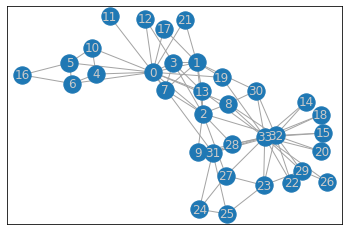

In [67]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# with sns.axes_style('white'):
#     fig = plt.subplots(1, figsize=(12,8))
nx.draw_networkx(kn, edge_color='#a4a4a4', with_labels=True, font_color='#cacaca')
#     plt.axis('off')

---
# Degree distribution

(array([  1.,   7.,  37.,  92., 197., 297., 216., 112.,  32.,   9.]),
 array([106. , 113.9, 121.8, 129.7, 137.6, 145.5, 153.4, 161.3, 169.2,
        177.1, 185. ]),
 <BarContainer object of 10 artists>)

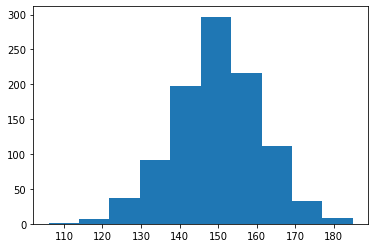

In [52]:
degree_sequence = sorted(map(lambda x: x[1], nx.degree(er)), reverse=True) 
plt.hist(degree_sequence, bins=10)

---
# Connected components

In [54]:
cc = nx.connected_components(er)
[len(c) for c in cc]

[1000]

In [63]:
er = nx.erdos_renyi_graph(1000, 0.001)
cc = nx.connected_components(er)
print(list([len(c) for c in cc]))

[1, 1, 2, 1, 73, 5, 1, 1, 1, 1, 51, 17, 1, 2, 1, 1, 29, 6, 1, 9, 3, 5, 2, 1, 1, 4, 1, 1, 2, 5, 2, 1, 9, 1, 5, 19, 1, 4, 1, 5, 1, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 2, 2, 4, 1, 3, 5, 1, 1, 3, 8, 1, 1, 2, 5, 2, 1, 1, 3, 1, 1, 1, 1, 2, 4, 4, 2, 3, 1, 1, 9, 1, 1, 1, 2, 9, 1, 1, 1, 1, 6, 2, 1, 1, 2, 5, 3, 1, 8, 3, 1, 8, 1, 1, 3, 1, 8, 1, 8, 5, 7, 1, 3, 3, 2, 11, 1, 1, 4, 2, 1, 1, 1, 2, 3, 3, 4, 1, 2, 5, 1, 1, 1, 4, 1, 1, 2, 9, 1, 2, 7, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 9, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 7, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 5, 2, 3, 1, 1, 2, 1, 1, 1, 5, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 

---
# Other stuff..

In [65]:
er = nx.erdos_renyi_graph(1000, 0.15)
print(nx.diameter(er))
print(nx.average_shortest_path_length(er))
print(nx.triangles(er, 0))

2
1.8505685685685687
1847
